In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16


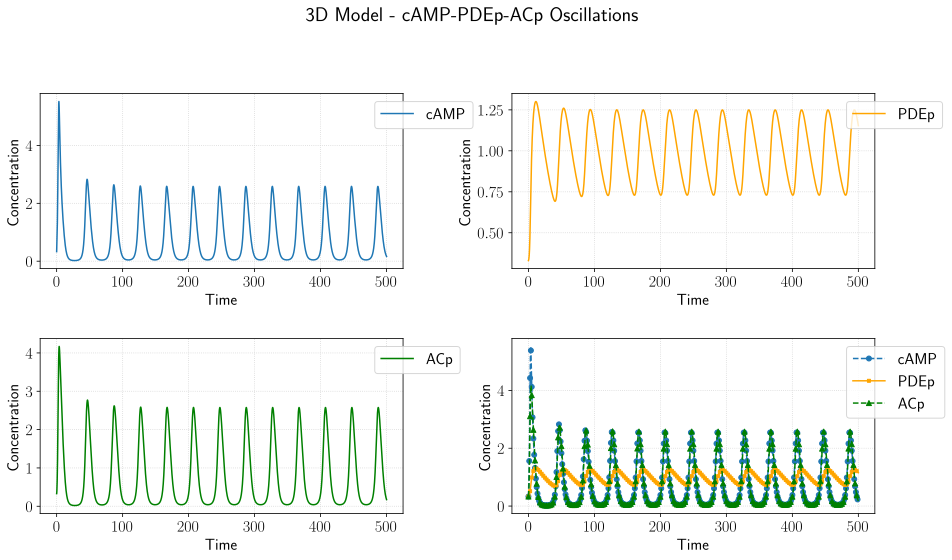

In [2]:
def cAMP_PDEp_ACp(t, x):
    cAMP = x[0]
    #PDE = x[1]
    PDEp = x[1]
    #AC = x[3]
    ACp = x[2]
    #cAMP = x[0]
    #PDE = x[1]
    #PDEp = x[1]
    #AC = x[3]
    #ACp = x[2]

    #dPDE  = r4*cAMP*PDEp/(K4+PDEp) - r3*Et*PDE /(K3+PDE )
    dPDEp  = r3 * cAMP * ((PDEt - PDEp) / Km3) - r4 * Et * PDEp / (Km4 + PDEp)

    #dAC  = r2*Dt *ACp/(K2+ACp) - r1*AC*cAMP /(K1+AC )
    dACp = r1 * cAMP * ((ACt-ACp) / Km1) - r2 * Dt * ACp / (Km2 + ACp)

        # Juliens Model
    #dACp = r1 * cAMP * ((ACt - ACp) / K1) - r2 * Dt * ACp / (K2 + ACp)
    #dPDEp = r3 * cAMP * (PDEp / K3) - r4 * Et * (PDEt - PDEp) / (K4 + (PDEt - PDEp))

    dcAMP = k0 + k1 * ACp - (k3 + k2 * PDEp) * cAMP


    #return [dcAMP, dPDE, dPDEp, dAC, dACp]
    return [dcAMP, dPDEp, dACp]

#frq = 1 # Adjusting oscillation frequency
k0, k1, k3, k2 = 0.0, 4.32, 0.58, 3.73
r1, r2, r3, r4 = 0.98, 4.48, 0.1, 0.14
Km1, Km2, Km3, Km4 = 2.48, 3.34, 9.24, 7.24
Dt, Et =  2.12, 1.6
ACt = 6.68
PDEt = 4.64
#q1, q2 = 0*frq*0.002, 0*frq*0.01
#K0 = 5
#Juliens parameters
#k0 = 0
#k1 = 2.88
#k3 = 0.75
#k4 = 2.23
#r1 = 0.5
#r2 = 0.5
#r3 = 0.91
#r4 = 2.3
#Et = 0.74
#Dt = 0.14
#K1 = 0.1
#K2 = 0.1
#K3 = 0.02
#K4 = 1.4
#ACt = 0.13
#PDEt = 1.34


#init_conditions = {'cAMP0': 0.33, 'PDE0': 0.33, 'PDEp0': 0.33, 'AC0': 0.33, 'ACp0': 0.33}
init_conditions = {'cAMP0': 0.33, 'PDEp0': 0.33,'ACp0': 0.33}
x0 = list(init_conditions.values())

solver = solve_ivp(cAMP_PDEp_ACp, [0, 1000], x0, t_eval=np.linspace(0, 500, 10000))


#cAMP, PDE, PDEp, AC, ACp = solver.y
cAMP, PDEp, ACp = solver.y
# Create a figure with multiple axes

fig = plt.figure(figsize=(16, 12))
fig.suptitle("3D Model - cAMP-PDEp-ACp Oscillations", fontsize=20)
gs = GridSpec(3, 2, figure=fig)
legend_position = {'bbox_to_anchor': (0.9, 1), 'loc': 'upper left'}



# First row
ax0 = fig.add_subplot(gs[0, 0])
ax0.grid(True, linestyle=':', color='lightgray')
ax0.plot(solver.t, cAMP, label='cAMP', color='#1f77b4')
ax0.set_xlabel('Time')
ax0.set_ylabel('Concentration')
#ax0.set_xlim(0, 100)
ax0.legend(**legend_position, fontsize=16)

ax1 = fig.add_subplot(gs[0, 1])
ax1.grid(True, linestyle=':', color='lightgray')
ax1.plot(solver.t, PDEp, label='PDEp', color='orange')
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration')
#ax1.set_xlim(0, 200)
ax1.legend(**legend_position, fontsize=16)

# Second row
ax2 = fig.add_subplot(gs[1, 0])
ax2.grid(True, linestyle=':', color='lightgray')
ax2.plot(solver.t, ACp, label='ACp', color='green')
ax2.set_xlabel('Time')
ax2.set_ylabel('Concentration')
#ax2.set_xlim(0, 200)
ax2.legend(**legend_position, fontsize=16)

ax3 = fig.add_subplot(gs[1, 1])
ax3.grid(True, linestyle=':', color='lightgray')
ax3.plot(solver.t, cAMP, label='cAMP', color='#1f77b4', linestyle='--', alpha=1, marker='o', markersize=5, markevery=25, linewidth = 1.5)
ax3.plot(solver.t, PDEp, label='PDEp', color='orange', linestyle='-', marker='s', markersize=3, markevery=50,  linewidth= 1.5)
ax3.plot(solver.t, ACp, label='ACp', color='green', linestyle='--', alpha=1, marker='^', markersize=5, markevery=50, linewidth = 1.5)
ax3.set_xlabel('Time')
ax3.set_ylabel('Concentration')
#ax3.set_xlim(0, 200)
ax3.legend(**legend_position, fontsize=16)

# Third row (centered 3D plot)
#ax4 = fig.add_subplot(gs[2, :], projection='3d')
#ax4.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp', color='green')
#ax4.set_xlabel('cAMP')
#ax4.set_ylabel('PDEp')
#ax4.set_zlabel('ACp')
#ax4.legend(**legend_position, fontsize=16)

# Adjust the spacing between the axes
fig.subplots_adjust(wspace=0.3, hspace=0.4, right=0.85)
fig.savefig('cAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')
# Show the plots

# Show the plots
plt.show()

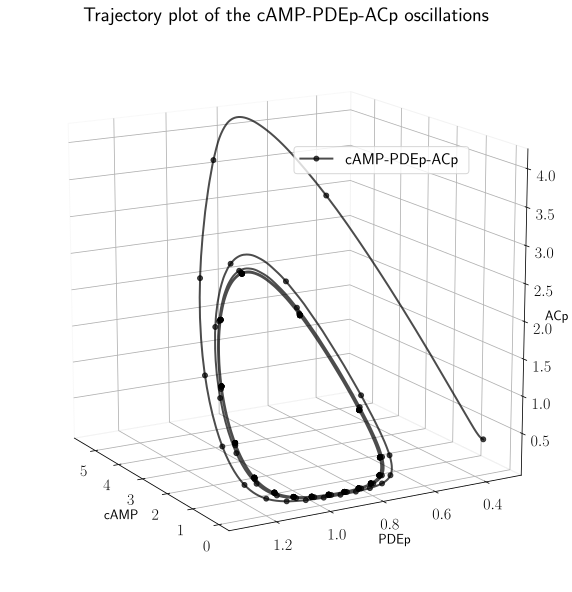

In [3]:
fig_3d = plt.figure(figsize=(10, 11))

# Add a 3D subplot
ax_3d = fig_3d.add_subplot(111, projection='3d')

# Plot the 3D data
ax_3d.plot(cAMP, PDEp, ACp, label='cAMP-PDEp-ACp', color='black', linestyle='-', linewidth=2, alpha=0.7, marker='o', markersize=5, markevery=50)
ax_3d.title.set_text('Trajectory plot of the cAMP-PDEp-ACp oscillations')
# Set the axis labels
ax_3d.set_xlabel('cAMP', fontsize=14, labelpad=5)
ax_3d.set_ylabel('PDEp', fontsize=14, labelpad=5)
ax_3d.set_zlabel('ACp', fontsize=14, labelpad=-1)

# Set the legend
legend_position = {'bbox_to_anchor': (0.5, 0.8), 'loc': 'upper left'}
ax_3d.legend(**legend_position, fontsize=16)

# Customize the appearance of the 3D plot
ax_3d.view_init(15,150)  # Adjust the view angle
ax_3d.set_box_aspect([1, 1, 1])  # Set the aspect ratio of the axes to be equal
ax_3d.xaxis.pane.fill = ax_3d.yaxis.pane.fill = ax_3d.zaxis.pane.fill = False  # Remove background color
ax_3d.grid(True, linestyle=':', color='lightgray')  # Add light, dotted gridlines

plt.savefig('3DcAMP_PDEp_ACp.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()